In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
pd.set

In [5]:
data = pd.read_csv('cleaned_data.csv',sep=',',index_col=0)
data

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.057513,0.089810,0.527778,0.006364,0.714603,0.183976,1,0.000740,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
99994,0.057078,0.225427,0.347222,0.002045,0.100473,0.931751,2,0.000426,5.0,1.0,...,0,0,0,0,1,0,0,0,0,0
99995,0.057078,0.225427,0.388889,0.002273,0.100473,0.934718,2,0.000426,6.0,1.0,...,0,0,0,0,1,0,0,0,0,0
99996,0.057078,0.225427,0.319444,0.002273,0.100473,0.937685,2,0.000426,5.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
x = data.drop(['Credit_Score'],axis=1)
y = data['Credit_Score']
x.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.083668,0.111111,0.002273,0.162020,0.658754,2,0.000602,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.056860,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.056860,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.057404,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


1.Dobór liczby komponentów do PCA z wykorzystaniem wizualizacji skumulowanej wartości wariancji dla różnych wartości komponentów.

array([0.68429748, 0.77263878, 0.79114156, 0.80521212, 0.81889243,
       0.83255535, 0.84615953, 0.859744  , 0.87325357, 0.88667764,
       0.90005256, 0.91341019, 0.92670334, 0.9398893 , 0.95284219,
       0.96570188, 0.9784155 , 0.98740711, 0.99255775, 0.99630176,
       0.99832482, 0.99944499, 0.99997989, 1.        , 1.        ])

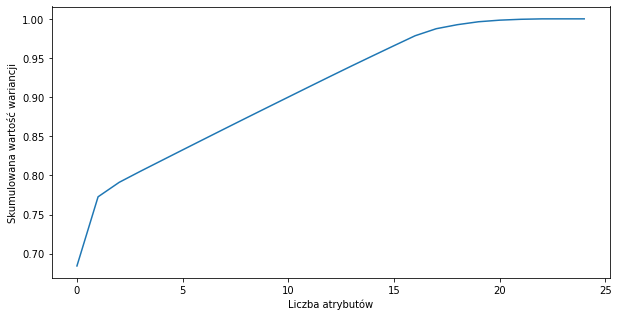

In [16]:
#wizualizacja skumulowanej wartości wariancji w zależności od liczby komponentów
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba atrybutów')
plt.ylabel('Skumulowana wartość wariancji')
plt.gcf().set_size_inches(10,5)

np.cumsum(pca.explained_variance_ratio_) #pierwsze 15 atrybutów wyjaśnia 95% całkowitej wariancji

2.Dobór liczby atrybutów do PCA z wykorzystaniem parametru svd_solver oraz narzuceniem wariancji.
PCA wybiera liczbę atrybutów, tak aby wielkość wariancji do wyjaśnienia była większa niż procent określony przez 'n_components'.

In [19]:
pca = PCA(svd_solver='full',n_components=0.95) 
glowne_skladowe = pca.fit_transform(x)
glowne_df = pd.DataFrame(data=glowne_skladowe)
glowne_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.758541,-0.773613,-0.035185,-0.090540,-0.010458,0.043380,-0.374975,-0.665290,0.544871,0.126687,0.032366,-0.016664,-0.045531,-0.052639,-0.108677
1,-1.238313,-0.841444,0.019733,-0.094205,-0.010815,0.045071,-0.371687,-0.666637,0.547165,0.127583,0.034072,-0.015994,-0.051982,-0.054112,-0.104612
2,-2.236991,-0.871857,0.035673,-0.096107,-0.010924,0.046166,-0.370837,-0.666949,0.548570,0.128254,0.034909,-0.015975,-0.055424,-0.054896,-0.102314
3,-2.236606,-0.876984,0.052226,-0.096325,-0.010843,0.045864,-0.369832,-0.667421,0.548187,0.128013,0.035302,-0.015599,-0.055050,-0.054929,-0.102419
4,2.760665,-0.738433,-0.024557,-0.106844,-0.635206,-0.536403,0.424712,0.032680,0.159058,0.059905,0.037172,-0.000872,-0.028050,-0.043574,-0.090261


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(glowne_df,y,test_size=0.25,random_state=42)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
51008,-2.270770,0.166749,0.064189,-0.059825,-0.009148,0.015452,-0.057270,-0.045852,-0.216051,-0.282616,-0.529301,-0.657945,-0.195263,-0.117018,-0.146693
56940,2.757464,-0.734270,-0.039750,-0.105240,-0.635746,-0.535714,0.421807,0.034123,0.158658,0.061105,0.036807,-0.000906,-0.025653,-0.042866,-0.091916
11876,1.759457,-0.715752,-0.168728,-0.060957,-0.003362,0.020809,-0.130235,-0.023439,-0.251338,-0.462695,0.743125,-0.091440,-0.195649,-0.110422,-0.139389
44822,-0.260020,0.115622,0.373749,0.954934,0.008808,-0.019039,0.054389,0.004529,0.047733,0.025239,0.017079,0.000413,-0.018488,-0.024591,-0.042348
61765,1.787460,-0.767306,0.059502,-0.075344,-0.004340,0.021773,-0.100379,-0.034601,-0.244858,-0.463615,0.746630,-0.096143,-0.230393,-0.118701,-0.116419


In [22]:
y_train.head()

72937    2
81481    2
16930    3
64112    2
88372    2
Name: Credit_Score, dtype: int64